In [ ]:
#!pip install tensorflow==2.0

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd



import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import LeakyReLU

from sklearn import metrics


In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

y_test_o = y_test

4423680/4422102 [==============================] - 0s 0us/step


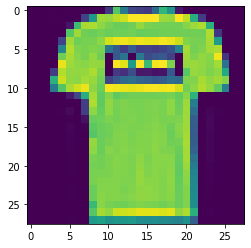

In [ ]:
plt.imshow(X_train[1])


In [ ]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0



# one hot encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:

# Create the model
model = Sequential()


model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))    #flattens the 28X28 image into 784 element array

model.add(Dense(784, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

       
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())





flatten (None, 28, 28) ==> (None, 784)
dense (None, 784) ==> (None, 784)
dense_1 (None, 784) ==> (None, 256)
dense_2 (None, 256) ==> (None, 10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 818,970
Trainable params: 818,970
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Compile model
epochs = 20
#lrate = 0.001
#decay = lrate/epochs
          


model.compile(loss='categorical_crossentropy',  optimizer='sgd' ,  metrics=['accuracy'] , )

#sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
# , optimizer='adam'



In [ ]:
# Fit the model

#early_stopping = EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='auto')
#callback_list = [early_stopping]# [stats, early_stopping]

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=500 )

# , callbacks=callback_list

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
120/120 [==============================] - 1s 5ms/step - loss: 1.4768 - accuracy: 0.5816 - val_loss: 1.0497 - val_accuracy: 0.6764
Epoch 2/20
120/120 [==============================] - 0s 4ms/step - loss: 0.9058 - accuracy: 0.7130 - val_loss: 0.8264 - val_accuracy: 0.7212
Epoch 3/20
120/120 [==============================] - 0s 4ms/step - loss: 0.7601 - accuracy: 0.7549 - val_loss: 0.7338 - val_accuracy: 0.7551
Epoch 4/20
120/120 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.7783 - val_loss: 0.6769 - val_accuracy: 0.7754
Epoch 5/20
120/120 [==============================] - 0s 4ms/step - loss: 0.6377 - accuracy: 0.7952 - val_loss: 0.6373 - val_accuracy: 0.7911
Epoch 6/20
120/120 [==============================] - 0s 4ms/step - loss: 0.6028 - accuracy: 0.8062 - val_loss: 0.6099 - val_accuracy: 0.7992
Epoch 7/20
120/120 [==============================] - 0s 4ms/step - loss: 0.5762 - accuracy: 0.8124 - val_loss: 0.5869 - val_accuracy: 0.8040
Epoch 

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
import numpy as np
print(y_predict[0])
np.argmax(y_predict[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


9

In [ ]:
from sklearn import metrics

y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(y_test_o,y_pred)
print(cm)

[[820   6  15  50  14   0  75   0  19   1]
 [  4 952   8  23  11   0   0   0   2   0]
 [ 17   1 652  10 263   0  42   0  15   0]
 [ 27  20  14 829  75   0  29   0   6   0]
 [  0   2  54  18 895   0  24   0   7   0]
 [  1   0   0   1   0 760   0 111  23 104]
 [159   3 125  35 261   0 380   0  37   0]
 [  0   0   0   0   0   6   0 908   2  84]
 [  1   1  14   7   4   1  13   7 952   0]
 [  0   0   0   0   0   2   1  38   1 958]]
